In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv('datos/us-airlines-monthly-aircraft-miles-flown.csv',header =0,parse_dates=[0])

In [3]:
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [12]:
df2.shape

(96, 2)

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month'>

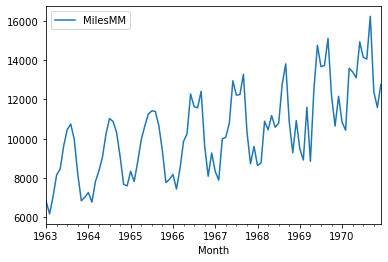

In [7]:
df2.plot(kind='line',x='Month',y='MilesMM')

In [8]:
quaterly_miles_df = df2.resample('Q',on='Month').mean()

In [9]:
quaterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [14]:
quaterly_miles_df.shape

(32, 1)

In [17]:
year_total_miles = df2.resample('A',on='Month').sum()

In [18]:
year_total_miles.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [19]:
year_total_miles.shape

(8, 1)

In [23]:
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [24]:
df2['year'] = df2['Month'].dt.year

In [25]:
df2.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [26]:
df2.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

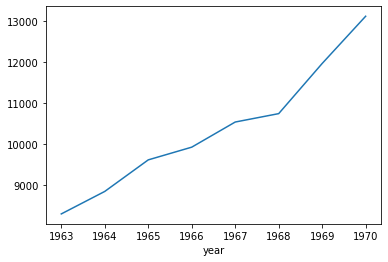

In [27]:
df2.groupby('year')['MilesMM'].mean().plot()

In [29]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

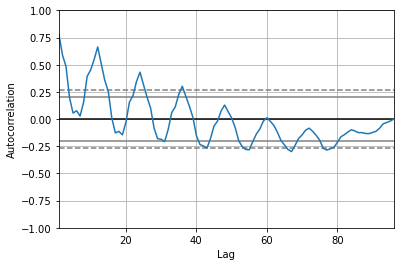

In [30]:
autocorrelation_plot(df2['MilesMM'])

In [31]:
## Downsampling

In [32]:
unsampled_miles = df2.resample('D',on='Month').mean()

In [34]:
unsampled_miles.head()

,MilesMM,year
Month,,
1963-01-01,6827.0,1963.0
1963-01-02,NaN,NaN
1963-01-03,NaN,NaN
1963-01-04,NaN,NaN
1963-01-05,NaN,NaN


In [35]:
interpolated_miles = unsampled_miles.interpolate(method='linear')

<AxesSubplot:xlabel='Month'>

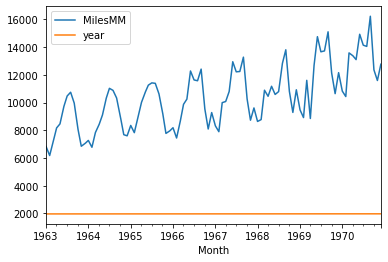

In [39]:
interpolated_miles.plot()

In [43]:
poly_interpolated_miles = unsampled_miles.interpolate(method='spline',order=2)

<AxesSubplot:xlabel='Month'>

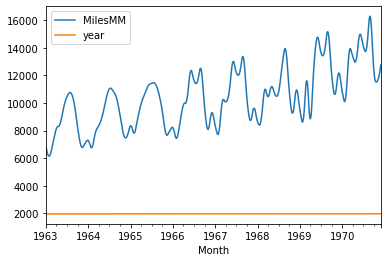

In [42]:
poly_interpolated_miles.plot()